# ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode=`nearest`)'

rotation_range: 이미지 회전 범위 (degrees)<br>

width_shift, height_shift: 그림을 수평 또는 수직으로 랜덤하게 평행 이동시키는 범위 (원본 가로, 세로 길이에 대한 비율 값)<br>

rescale: 원본 영상은 0-255의 RGB 계수로 구성되는데, 이 같은 입력값은 모델을 효과적으로 학습시키기에 너무 높습니다 (통상적인 learning rate를 사용할 경우). 그래서 이를 1/255로 스케일링하여 0-1 범위로 변환시켜줍니다. 이는 다른 전처리 과정에 앞서 가장 먼저 적용됩니다.<br>

shear_range: 임의 전단 변환 (shearing transformation) 범위<br>

zoom_range: 임의 확대/축소 범위<br>

horizontal_flip: True로 설정할 경우, 50% 확률로 이미지를 수평으로 뒤집습니다. 원본 이미지에 수평 비대칭성이 없을 때 효과적입니다. 즉, 뒤집어도 자연스러울 때 사용하면 좋습니다.<br>

fill_mode 이미지를 회전, 이동하거나 축소할 때 생기는 공간을 채우는 방식

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')
# 모델 학습에 용이한 데이터 불러오기
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet'

np.random.seed(15)

#제너레이터로 이미지 사이즈가 고정되도록 함
train_datagen = ImageDataGenerator(rescale = 1. /255)
#opencv로 진행해볼것
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size =(300, 300),
    batch_size = 100, # 25503개로 수정해봐야함
    class_mode = 'categorical',
)

x,y = train_generator.next()

img_dataFrame = pd.DataFrame({'이미지 픽셀값':list(x), '타깃값':list(y)})
img_dataFrame.head(100)


#print('X_train shape: ', x[0].shape)
#print(x[0])
#plt.imshow(x[0])
#plt.show()

Mounted at /content/drive


NameError: ignored

# 새로운 방법

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import pandas as pd
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')
#시각화 처리
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

Mounted at /content/drive


In [ ]:
img_dataFrame = pd.DataFrame(columns=['image address'], index = range(25503))
img_dataFrame.shape

(25503, 1)

In [ ]:
import os
 
img_path_list = []
possible_img_extension = ['.jpg', '.jpeg', '.JPG', '.bmp', '.png'] # 이미지 확장자들

np.random.seed(15)

directory_path = '/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet'
directory_list = os.listdir(directory_path)
print(directory_list)


dl=[]

label = []
count = -1
for i in  directory_list:
  dl.append('/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/'+i)


for dlf in dl:
  count +=1
  label_count = 0
  for (root, dirs, files) in os.walk(dlf):
    if len(files) > 0:
      for file_name in files:
        label.append(count)
        label_count+=1

        if os.path.splitext(file_name)[1] in possible_img_extension:
          img_path = root + '/' + file_name
                
          # 경로에서 \를 모두 /로 바꿔줘야함
          img_path = img_path.replace('\\', '/') # \는 \\로 나타내야함         
          img_path_list.append(img_path)
    print(label_count)
    label_count+=1
                             
#print(img_path_list)
img_dataFrame['image address'] = img_path_list
img_dataFrame['label'] = label
img_dataFrame.shape
img_dataFrame.head(10000)

['L2_10', 'L2_12', 'L2_15', 'L2_20', 'L2_21', 'L2_24', 'L2_25', 'L2_27', 'L2_3', 'L2_30', 'L2_33', 'L2_34', 'L2_39', 'L2_40', 'L2_41', 'L2_44', 'L2_45', 'L2_46', 'L2_50', 'L2_52']
1893
518
1509
410
410
782
6189
426
595
364
6206
419
454
180
593
547
631
2214
781
382


,image address,label
0,/content/drive/MyDrive/Colab Notebooks/DataCre...,0
1,/content/drive/MyDrive/Colab Notebooks/DataCre...,0
2,/content/drive/MyDrive/Colab Notebooks/DataCre...,0
3,/content/drive/MyDrive/Colab Notebooks/DataCre...,0
4,/content/drive/MyDrive/Colab Notebooks/DataCre...,0
...,...,...
9995,/content/drive/MyDrive/Colab Notebooks/DataCre...,6
9996,/content/drive/MyDrive/Colab Notebooks/DataCre...,6
9997,/content/drive/MyDrive/Colab Notebooks/DataCre...,6
9998,/content/drive/MyDrive/Colab Notebooks/DataCre...,6


In [ ]:
from PIL import Image

img_list_np = []

for i in img_path_list:
    image = Image.open(i)
    if image.mode != 'RGB': 
      image = image.convert('RGB') #RGB 모드가 아닌 이미지를 rgb로 변환
    image = image.resize((100,100)) #이미지 사이즈 설정

    img_array = np.array(image)
    img_list_np.append(img_array)
    print(i, " 추가 완료 - 구조:", img_array.shape) # 불러온 이미지의 차원 확인 (세로X가로X색)
    #print(img_array.T.shape) #축변경 (색X가로X세로)

/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_10/cvleystsurkczhmvnrmt.jpg  추가 완료 - 구조: (100, 100, 3)
/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_10/ycrqupsfbtdmppsedlxl.jpg  추가 완료 - 구조: (100, 100, 3)
/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_10/xvrshedtlvgyjdfyjmls.jpg  추가 완료 - 구조: (100, 100, 3)
/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_10/enraiajslpvuvcpdwhce.jpg  추가 완료 - 구조: (100, 100, 3)
/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_10/iggmyrvxuuodahwxdpcs.jpg  추가 완료 - 구조: (100, 100, 3)
/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_10/wweggkosnfiqvyseukfa.jpg  추가 완료 - 구조: (100, 100, 3)
/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_10/btuixnvjxcztpmutlehv.jpg  추가 완료 - 구조: (100, 100, 3)
/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_10/pwehgcayutliqfvyvxcm.jpg  추가 완료 - 구조: (100, 100, 3)
/content/drive/MyDrive/Colab Not

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_41/hhhhiavwwdytwjsvwgtv.jpg  추가 완료 - 구조: (100, 100, 3)
/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_41/nargedsqusnkzkfwxkje.jpg  추가 완료 - 구조: (100, 100, 3)
/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_41/qidkkbmvnagtdjnmpgfd.jpg  추가 완료 - 구조: (100, 100, 3)
/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_41/lhmtveghjnczgguytlqx.jpg  추가 완료 - 구조: (100, 100, 3)
/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_41/dmqdwsedrcydkmniydlw.png  추가 완료 - 구조: (100, 100, 3)
/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_41/szfqmropzcaevghrilke.jpg  추가 완료 - 구조: (100, 100, 3)
/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_41/jhfbjiefvhimqhblihgj.jpg  추가 완료 - 구조: (100, 100, 3)
/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/DataSet/L2_41/dzoinzzrxkktpyjgazmr.jpg  추가 완료 -

In [ ]:
#img_np : 이미지를 넘파이배열로 만든것
img_np = np.array(img_list_np) #리스트를 numpy로 변환
print(img_np.shape)

#img_dataFrame['image numpy'] = img_np

np.save('./sample_data', img_np)  # x_save.npy
np.save('/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/sample_data.npy', img_np)
print(img_np.shape)
print("저장 완료")

(25503, 100, 100, 3)
(25503, 100, 100, 3)
저장 완료


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np

sample_data = np.load('/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp/sample_data.npy')
# fruits = np.load('fruits_300.npy')
# If M is (32 x 32 x 3), then .reshape(1,-1) will produce a 2d array (not 1d), of shape (1, 32*32*3).
# That can be reshaped back to (32,32,3) with the same sort of reshape statement.
sample_data_2d = sample_data.reshape(-1, 100 * 100 * 3)

print("sample_data의 shape 맞추기:", sample_data)
print("sample_data_2d의 shape 맞추기:", sample_data_2d)
# 여기에서 출력되는 차원의 숫자가 같아야 한다.
print("sample_data.shape:", sample_data.shape)
print("sample_data_2d.shape:", sample_data_2d.shape)


sample_data의 shape 맞추기: [[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [

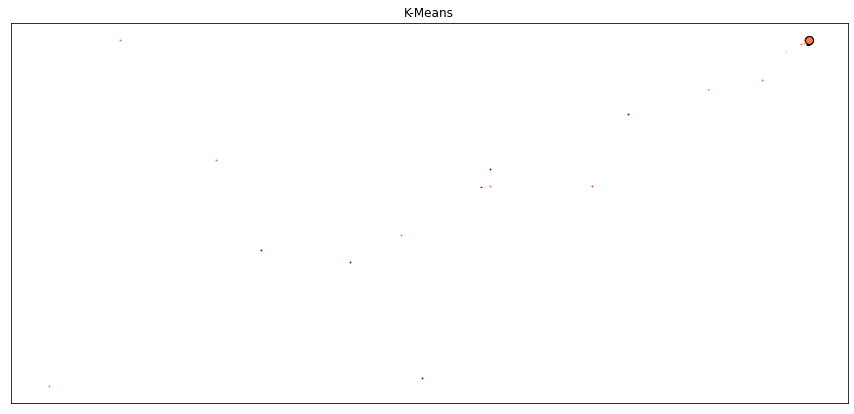

In [5]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10,random_state=42)
minibatch_kmeans.fit(sample_data_2d)

fig = plt.figure(figsize=(15,7))
km_labels = minibatch_kmeans.labels_
km_centers = minibatch_kmeans.cluster_centers_
colors = plt.cm.Spectral(np.linspace(0,1,len(set(km_labels))))
ax = fig.add_subplot(1,1,1)
for k, col in zip(range(3),colors):
  my_members = (km_labels == k)
  cluster_center = km_centers[k]
  ax.plot(sample_data_2d[my_members, 0], sample_data_2d[my_members, 1],'w',markerfacecolor = col, marker = '.')
  ax.plot(cluster_center[0], cluster_center[1],'o',markerfacecolor = col, markeredgecolor = 'k',markersize=8)
ax.set_title('K-Means')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# K값을 지정해 준다.random_state=항상 값은값이 랜덤하게 나온다.
km = KMeans(n_clusters=250, random_state=42)
# 사이킷 런의 철학은 nxd, 갯수x차원
km.fit(sample_data_2d)
# 할당된 레이블의 결과를 볼 수 있다.
print("km.labels_", km.labels_)
print("km.labels_.shape", km.labels_.shape)
print("첫번째:", km.labels_[0:])

print(np.unique(km.labels_, return_counts=True))
print(km.labels_)

KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

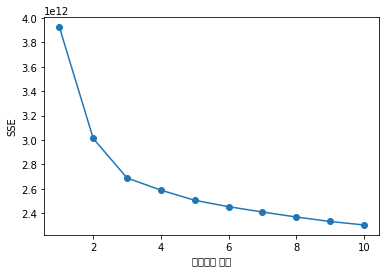

In [ ]:
#elbow 기법으로 최적의 cluster 찾기
import matplotlib.pyplot as plt
sse= []
for i in range(1,11):
  km = KMeans(n_clusters=i,init='k-means++',random_state = 0)
  km.fit(sample_data_2d)
  sse.append(km.inertia_)
plt.plot(range(1,11),sse,marker='o')
plt.xlabel('클러스터 개수')
plt.ylabel('SSE')
plt.show()

KeyboardInterrupt: ignored

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: ignored

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


[[254.36460369 254.39771987 254.40608035 ... 253.70141151 253.66221498
  253.59185668]
 [111.22232824 109.4976145  105.46755725 ...  95.03435115  88.63311069
   81.01669847]
 [254.87469184 254.89835881 254.87581883 ... 254.66985983 254.62992181
  254.63133056]]
[0 2 0 ... 0 2 0]


[[254.01498127 254.03183521 253.95318352 ... 252.70224719 252.70411985
  252.73220974]
 [254.93721973 254.93721973 254.92096413 ... 254.93890135 254.93890135
  254.92264574]
 [177.12295082 185.30122951 190.9897541  ... 111.79918033 109.12090164
  101.57581967]
 ...
 [254.82783229 254.84032114 254.85013381 ... 254.99732382 254.99732382
  254.9955397 ]
 [110.38336052 104.30995106  96.48450245 ...  73.25122349  64.78466558
   56.55954323]
 [255.         255.         254.99606041 ... 254.86342745 254.86999343
  254.86802364]]
[ 7  6 16 ...  9 24 24]


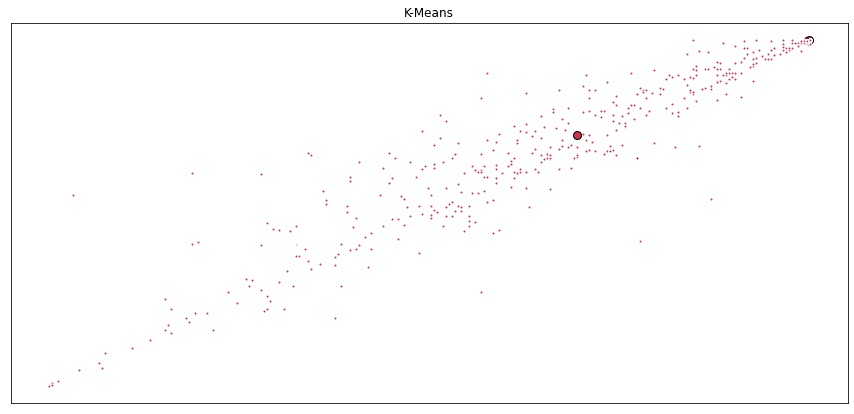

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
km = KMeans(n_clusters=25, random_state=42)
km.fit(sample_data_2d)
print(km.cluster_centers_)
print(km.labels_)
fig = plt.figure(figsize=(15,7))
km_labels = km.labels_
km_centers = km.cluster_centers_
colors = plt.cm.Spectral(np.linspace(0,1,len(set(km_labels))))
ax = fig.add_subplot(1,1,1)
for k, col in zip(range(3),colors):
  my_members = (km_labels == k)
  cluster_center = km_centers[k]
  ax.plot(sample_data_2d[my_members, 0], sample_data_2d[my_members, 1],'w',markerfacecolor = col, marker = '.')
  ax.plot(cluster_center[0], cluster_center[1],'o',markerfacecolor = col, markeredgecolor = 'k',markersize=8)
ax.set_title('K-Means')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

[[254.76855895 254.83624454 254.87991266 ... 254.82751092 254.82969432
  254.83624454]
 [177.57728707 186.60567823 194.08201893 ...  92.49526814  89.73817035
   80.78864353]
 [254.97843666 254.96091644 254.93261456 ... 255.         255.
  254.99865229]
 ...
 [253.77494692 253.77919321 253.76220807 ... 254.22929936 254.22929936
  254.22929936]
 [254.76583211 254.75699558 254.75699558 ... 254.73637703 254.72312224
  254.83799705]
 [254.98924731 254.98924731 254.98387097 ... 255.         255.
  254.99462366]]
[33 24 26 ... 42 23 23]


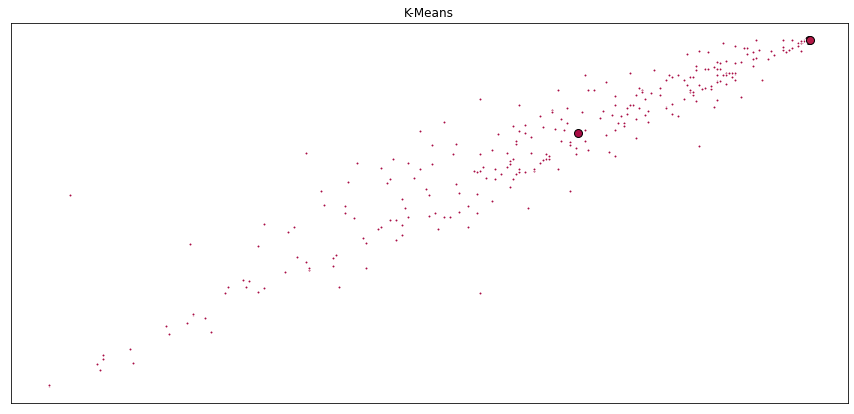

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
km = KMeans(n_clusters=50, random_state=42)
km.fit(sample_data_2d)
print(km.cluster_centers_)
print(km.labels_)
fig = plt.figure(figsize=(15,7))
km_labels = km.labels_
km_centers = km.cluster_centers_
colors = plt.cm.Spectral(np.linspace(0,1,len(set(km_labels))))
ax = fig.add_subplot(1,1,1)
for k, col in zip(range(3),colors):
  my_members = (km_labels == k)
  cluster_center = km_centers[k]
  ax.plot(sample_data_2d[my_members, 0], sample_data_2d[my_members, 1],'w',markerfacecolor = col, marker = '.')
  ax.plot(cluster_center[0], cluster_center[1],'o',markerfacecolor = col, markeredgecolor = 'k',markersize=8)
ax.set_title('K-Means')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

[[254.98969072 255.         255.         ... 255.         255.
  255.        ]
 [255.         255.         255.         ... 254.35087719 254.36842105
  254.42105263]
 [255.         254.997151   255.         ... 255.         254.997151
  255.        ]
 ...
 [254.66352201 254.66352201 254.6572327  ... 254.67295597 254.67295597
  254.66666667]
 [255.         255.         254.98561151 ... 255.         255.
  255.        ]
 [254.96837945 254.94268775 254.90118577 ... 255.         255.
  254.99802372]]
[41 13 77 ... 42 97 30]


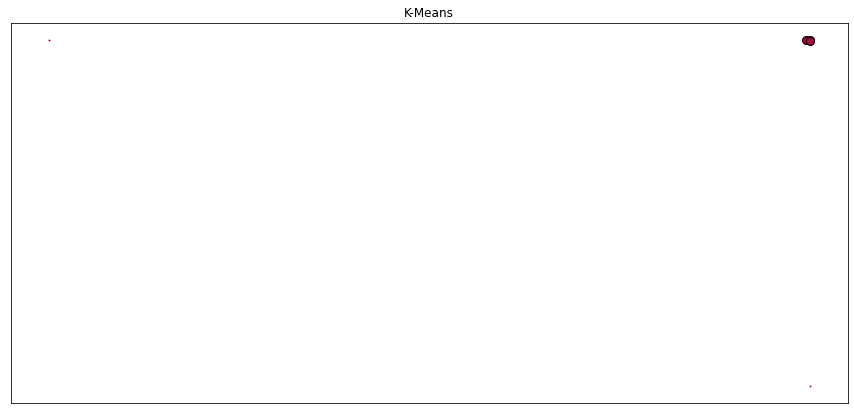

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
km = KMeans(n_clusters=100, random_state=42)
km.fit(sample_data_2d)
print(km.cluster_centers_)
print(km.labels_)
fig = plt.figure(figsize=(15,7))
km_labels = km.labels_
km_centers = km.cluster_centers_
colors = plt.cm.Spectral(np.linspace(0,1,len(set(km_labels))))
ax = fig.add_subplot(1,1,1)
for k, col in zip(range(3),colors):
  my_members = (km_labels == k)
  cluster_center = km_centers[k]
  ax.plot(sample_data_2d[my_members, 0], sample_data_2d[my_members, 1],'w',markerfacecolor = col, marker = '.')
  ax.plot(cluster_center[0], cluster_center[1],'o',markerfacecolor = col, markeredgecolor = 'k',markersize=8)
ax.set_title('K-Means')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [ ]:
import matplotlib.pyplot as plt


def draw_sample_data(arr, ratio=1):
    n = len(arr)  # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    print(n)
    rows = int(np.ceil(n / 10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols * ratio, rows * ratio), squeeze=False)
    for i in range(rows):
        print(i)
        for j in range(cols):
            if i * 10 + j < n:  # n 개까지만 그립니다.
                print(i)
                axs[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()


draw_sample_data(sample_data[km.labels_ == 0])
draw_sample_data(sample_data[km.labels_ == 1])
draw_sample_data(sample_data[km.labels_ == 2])
draw_sample_data(sample_data[km.labels_ == 3])
draw_sample_data(sample_data[km.labels_ == 4])

Output hidden; open in https://colab.research.google.com to view.

# OPENCV 사용해보기
import cv2

**메서드 imread()**
cv2.imread(filename, flag) : 이미지를 읽어 Numpy 객체로 만드는 함수
flag


*   IMREAD_COLOR : 이미지를 COLOR로 읽고 투명한 부분 무시
*   IMREAD_GRAYSCALE : 이미지를 Grayscale로 읽기
*   IMREAD_UNCHAGED : 이미지를 Color로 읽고, 투명한 부분도 읽기(Alpha)

반환 값 : Numpy 객체(행, 열, 생상 : 기본 rgb)

**메서드 imshow(title, image)**
cv.imshow(title, image) : 특정한 이미지 출력

코랩에서는 아래와 같이 사용가능
from google.colab.patches import cv2_imshow
cv2_imshow(img)

**메서드 imwrite**
cv.imwrite(file_name, image) : 이미지 저장하기

**이미지의 행렬 표현**
한 픽셀 당 rgb로 표현<br>

**메서드 cvtColor()**
cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
+ 처음 cv2로 이미지를 불러오면 픽셀의 정보가 BGR순
+ matplotlib같은 라이브러리는 RGB순으로 받아와야 하기에 BGR에서 RGB로 픽셀정보의 순서를 변경


**메서드 resize()**
cv2.resize(image, dsize, fx, fy, interpolation) : 이미지 크기 조절

- dsize : Manual size(None)
- fx : 가로 비율
- fy : 세로 비율
- interpolation : 보간법
  + INTER_CUBIC : 사이즈를 크게할 때
  + INTER_AREA : 사이즈를 작게 할 때


**메서드 warpAffine()**
cv2.warpAffine(image, M, dsize) : 위치 옮기기
+ M : 변환행렬
+ dsize : Manual Size

**메서드 add()**
cv2.add(image1, image2) : Saturation 연산을 수행(0보다 작으면 0, 255보다 크면 255로 표현)


# OpenCV 임계점 처리하기
## 이미지의 기본 이진화
**메서드 threshold()**
cv2.threshold(image, thresh, max_value, type) : 임계값을 기준으로 흑/백으로 분류하는 함수
+ image: 처리할 Gray Scale 이미지
+ thresh: 임계값(전체 픽셀에 적용) => 어떤 한계치를 초과할 경우 조치를 취하겠다!
+ max_value: 임계값을 넘었을때 적용할 값
+ type: 임계점을 처리하는 방식
  + THRESH_BINARY : 임계값 보다 크면 max_value, 작으면 0
  + THRESH_BINARY_INV : 임계값보다 작으면 max_value, 크면 0
  + THRESH_TRUNC : 임계값보다 크면 임계값, 작으면 그대로
  + THRESH_TOZERO : 임계값보다 크면 그대로, 작으면 0
  + THRESH_TOZERO_INV : 임계값보다 크면 0. 작으면 그대로

In [6]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import os
from model import get_classifier
from sklearn.metrics import f1_score, classification_report

os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)


def run_eval(model, loader):     
    preds = []
    labels = []
    for img, label in loader:
        y_prob = model.predict(img)
        y_pred = np.argmax(y_prob, axis=1)

        preds.append(y_pred)
        labels.append(label)
    
    y_pred = np.concatenate(preds, axis=0)
    y_test = np.concatenate(labels, axis=0)
    result = classification_report(y_test, y_pred, output_dict=True)

    return pd.DataFrame(result)


def freeze(model):
    for layer in model.layers:
        layer.trainable = False
        
    return model


def check_across_seeds(accs, f1s, result_df, num_classes=20):
    accs = np.array(accs)
    f1s = np.array(f1s)
    
    assert np.all(np.abs(accs[1:] - accs[:1]) < 1e-1) and np.all(np.abs(f1s[1:] - f1s[:1]) < 1e-1), "test results are not compatible \n{}\n{}".format(accs, f1s)

    print("*** CLASSWISE RESULT ***")
    cwise_result = result_df.loc[['f1-score', 'recall', 'support'], [str(i) for i in range(num_classes)]]
    cwise_result = cwise_result.rename(index={'f1-score' : 'f1', 'recall' : 'acc', 'support' : 'support'})
    print(cwise_result)
    
    print("\n*** AVG RESULT ***")
    avg_result = pd.Series({'f1' : result_df.loc['f1-score', 'macro avg'], 'acc' : result_df['accuracy'].values[0]})
    print(avg_result)
    
    
def main():
    ''' 
    Fill in the root directory path into DATA_DIR.
    You must write the subset directory for the specific split (train or valid).
    Under the root directory, the child folders should be "L2_3", "L2_10", ... , "L2_52"
    
    EX) if you named your valid dataset folder as "~/valid"
    then the child directory should be "~/valid/L2_3", "~/valid/L2_10", ... , "~/valid/L2_52"
    
    so you have to write as
    DATA_DIR = "~/valid"
    '''
    DATA_DIR = "YOUR DATA DIRECTORY"            
    IMAGENET_DEFAULT_MEAN = (0.485, 0.456, 0.406)
    IMAGENET_DEFAULT_VAR = (0.229 ** 2, 0.224 ** 2, 0.225 ** 2)
    
    
    ''' 
    You need to implement "get_classifier" function that returns your implemented model.
    "get_classifier" should return your model defined with your model configuration.
    Also, you should save your model.
    
    EX)
    model.save_weights('model.ckpt')
    or
    model.save('model.h5')
    '''
    CLF = get_classifier(num_classes=20) 
    CKPT_PATH = "YOUR CHECKPOINT PATH"  
    
    """ if saved with model.save_weights() """
    CLF.load_weights(CKPT_PATH).expect_partial()
    # if necessary
    # CLF.build(input_shape=[None, 224, 224, 3])
    # print(CLF.summary())
    
    """ if saved with model.save() """
    # CLF = load_model(CKPT_PATH)

    CLF = freeze(CLF)
    CLF.compile(metrics=['accuracy'])
    
    SEEDS = [0, 5, 10]
    ACC_LIST = []
    F1_LIST = []
    for seed in SEEDS:
        tf.random.set_seed(seed)
        
        loader = tf.keras.preprocessing.image_dataset_from_directory(
            directory=DATA_DIR,
            image_size=(256, 256),
            batch_size=128,
            shuffle=False
            )
        
        augmentation_layer = tf.keras.Sequential([
            tf.keras.layers.CenterCrop(224,224),
            tf.keras.layers.Rescaling(1./255),  
            tf.keras.layers.experimental.preprocessing.Normalization(mean=IMAGENET_DEFAULT_MEAN, variance=IMAGENET_DEFAULT_VAR)          
        ])
        loader = loader.map(lambda x,y: (augmentation_layer(x),y))
        
        RESULT_DF = run_eval(CLF, loader)
        ACC_LIST.append(RESULT_DF['accuracy'].values[0])
        F1_LIST.append(RESULT_DF.loc['f1-score', 'macro avg'])

    check_across_seeds(ACC_LIST, F1_LIST, RESULT_DF)

    
if __name__=="__main__":
    main()    

ModuleNotFoundError: ignored